In [1]:
conda install -c conda-forge imbalanced-learn

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [2]:
conda install -c conda-forge boruta_py

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from BorutaShap import BorutaShap, load_data
from boruta import BorutaPy
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, accuracy_score, confusion_matrix, precision_score, recall_score, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

In [12]:
app_train = pd.read_csv(r'C:\Users\Admin\Documents\GitHub\CreditRiskML2\data/loandata.csv')

In [21]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

app_train.head(200)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,collections_12_mths_ex_med,policy_code,application_type
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,Other,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,2.0,3,0,13648,83.7,9,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,Jan-16,0,1,INDIVIDUAL
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,6.0,3,0,1687,9.4,4,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0,1,INDIVIDUAL
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,Other,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > I own a small h...,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,7.0,2,0,2956,98.5,10,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,Jan-16,0,1,INDIVIDUAL
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,10,0,5598,21.0,37,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,Jan-15,0,1,INDIVIDUAL
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0,Jan-96,0,38.0,15,0,27783,53.9,38,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Jan-16,0,1,INDIVIDUAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,1067038,1301405,12000,12000,12000.0,36 months,14.27,411.71,C,C2,Corning Inc.,8 years,MORTGAGE,70000.0,Not Verified,Dec-11,Charged Off,n,NaN,other,Debt Consolidation Loan,148xx,NY,8.40,0,Aug-05,1,NaN,7,0,11546,86.2,12,f,0.0,0.0,4241.160000,4241.16,2534.26,1163.48,0.00,543.42,5.32,Oct-12,411.71,Feb-13,0,1,INDIVIDUAL
196,1067030,1301397,25000,25000,25000.0,36 months,11.71,826.90,B,B3,UPS,10+ years,MORTGAGE,100000.0,Verified,Dec-11,Fully Paid,n,Borrower added on 12/14/11 > Secure employme...,debt_consolidation,Debt Consolidation Loan,028xx,RI,6.88,0,Dec-86,1,NaN,8,0,21128,89.1,18,f,0.0,0.0,29277.573840,29277.57,25000.00,4277.57,0.00,0.00,0.00,Sep-14,1122.55,Aug-14,0,1,INDIVIDUAL
197,1065350,1299445,9000,9000,9000.0,36 months,12.69,301.91,B,B5,Gilbert Express,5 years,RENT,50000.0,Source Verified,Dec-11,Fully Paid,n,Borrower added on 12/13/11 > All $$$ will be...,debt_consolidation,Debt Consolidation Loan,115xx,NY,17.81,0,Dec-01,1,NaN,13,0,12752,55.4,21,f,0.0,0.0,10867.209980,10867.21,9000.00,1867.21,0.00,0.00,0.00,Jan-15,306.11,Sep-15,0,1,INDIVIDUAL
198,1067028,1301395,13250,13250,13250.0,36 months,10.65,431.60,B,B2,Talbert House,4 years,RENT,35000.0,Not Verified,Dec-11,Fully Paid,n,Borrower added on 12/13/11 > Getting rid of ...,debt_consolidation,Debt Consolidation Loan,450xx,OH,24.93,0,Oct-02,2,NaN,11,0,13392,58.7,25,f,0.0,0.0,15535.931860,15535.93,13250.00,2285.93,0.00,0.00,0.00,Jan-15,437.68,Jan-16,0,1,INDIVIDUAL


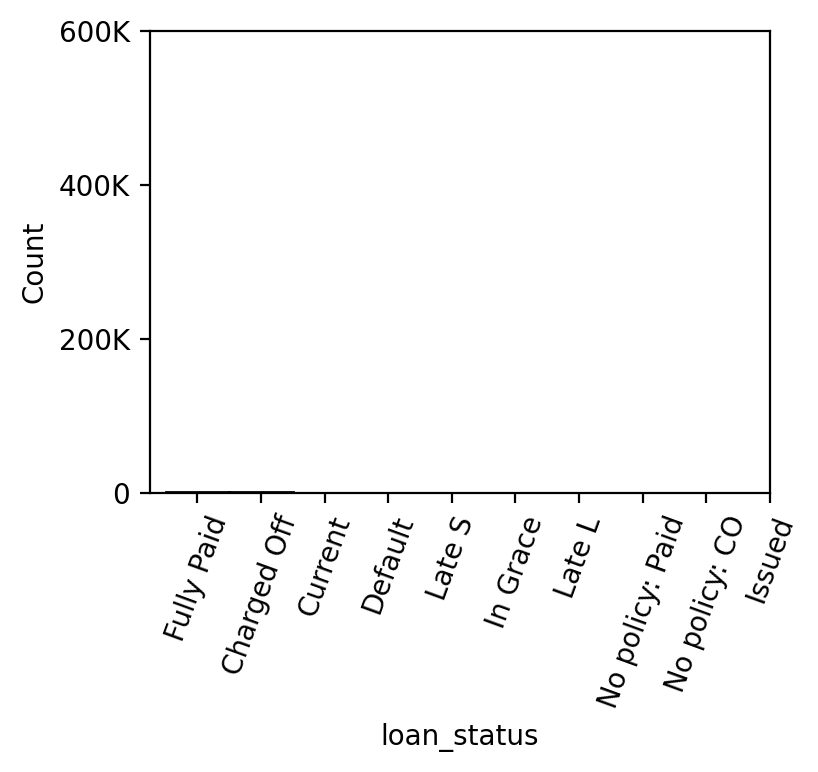

In [22]:
plt.figure(figsize=(4, 3), dpi=200)

# Create a histogram using seaborn
sns.histplot(app_train.loan_status, kde=False)

# Specify the locations of the x-tick marks
plt.xticks([0,1, 2, 3, 4, 5, 6, 7, 8, 9], ['Fully Paid', 'Charged Off', 'Current', 'Default', 'Late S', 'In Grace','Late L', 'No policy: Paid', 'No policy: CO', 'Issued'])

plt.yticks([0, 200000, 400000, 600000], ['0','200K','400K','600K'])

# Rotate the x-labels by 45 degrees
plt.xticks(rotation=70)

plt.savefig('status.svg', format='svg')

# Show the plot
plt.show()